In [1]:
import numpy as np
import pandas as pa
from matplotlib import pyplot as plt

In [2]:
data= pa.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None,names=['classes','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])
data.head()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


On importe les modules importants et notre database, puis on affiche rapidement la tête de cet ensemble de données.

In [3]:
x=data.iloc[:, 1:]
y=data.iloc[:, 0]

In [4]:
X = pa.get_dummies(x)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Ces cellules charge les données du dataset "agaricus-lepiota" en utilisant la fonction read_csv de la bibliothèque Pandas. Le paramètre header=None indique que le fichier ne contient pas de ligne d'en-tête et names fournit une liste de noms de colonnes pour les données.

Ensuite, la variable x est initialisée pour contenir toutes les colonnes sauf la première qui contient les classes de champignons comestibles ou vénéneux. La variable y contient la colonne des classes.

Ces cellules divise les données en un ensemble d'entraînement (X_train et y_train) et un ensemble de test (X_test et y_test) en utilisant la fonction train_test_split de scikit-learn. Ici, 80% des données sont utilisées pour l'entraînement et 20% pour le test. Le paramètre random_state est utilisé pour initialiser la génération aléatoire des données et garantir que les mêmes données d'entraînement et de test sont produites chaque fois que le code est exécuté.

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Le code utilise la classe DecisionTreeClassifier du module sklearn.tree pour créer un objet clf qui représente un modèle de classification par arbre de décision.

Ensuite, il utilise la méthode fit() pour entraîner le modèle sur les données d'entraînement (X_train et y_train).

Le résultat affiché est l'objet clf lui-même, qui contient toutes les informations relatives au modèle entraîné.

In [6]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Le code ci-dessus utilise le modèle d'arbre de décision pour prédire la classe des champignons dans l'ensemble de test, puis calcule la précision du modèle en comparant les prédictions avec les vraies étiquettes.

La fonction predict() est utilisée pour prédire les étiquettes de classe sur l'ensemble de test X_test. Ensuite, la précision est calculée en utilisant la fonction accuracy_score() de la bibliothèque scikit-learn qui compare les étiquettes de classe prédites y_pred avec les étiquettes de classe réelles y_test.

Le résultat affiché est une précision de 1.0, ce qui signifie que le modèle a correctement prédit toutes les étiquettes de classe dans l'ensemble de test. Cela semble presque trop parfait pour être vrai et cela pourrait indiquer un possible surajustement (overfitting) du modèle aux données d'entraînement. Il serait judicieux de tester ce modèle sur d'autres ensembles de données pour confirmer s'il est généralisable et éviter de se fier uniquement à cette précision de 1.0.

In [7]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(clf, X, y, cv=5)
mean_score = scores.mean()
print("Score de validation croisée:", mean_score)

Score de validation croisée: 0.996182796513831


Le code utilise la méthode de validation croisée pour évaluer les performances du modèle de classification basé sur l'arbre de décision.

La fonction cross_val_score de la bibliothèque scikit-learn est utilisée pour entraîner et tester le modèle sur 5 ensembles de données différents. Les données sont divisées en 5 ensembles égaux, et à chaque itération, l'ensemble de test est différent et les autres ensembles sont utilisés pour l'entraînement du modèle.

Le score de validation croisée obtenu ici est très élevé (0,996) ce qui signifie que le modèle est très précis et qu'il généralise bien aux nouvelles données. Cela suggère que le modèle est capable de classifier avec précision les champignons comme comestibles ou toxiques.

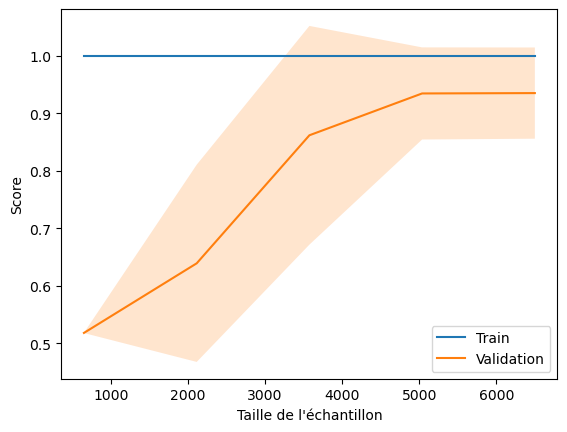

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

# Création d'un modèle de forêt aléatoire
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Calcul de la courbe d'apprentissage et de la courbe de validation
train_sizes, train_scores, valid_scores = learning_curve(model, X, y, cv=5)

# Calcul des moyennes et des écarts-types des scores d'apprentissage et de validation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Tracé de la courbe d'apprentissage et de la courbe de validation
plt.plot(train_sizes, train_mean, label='Train')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, valid_mean, label='Validation')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2)
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

Le code permet de calculer et tracer la courbe d'apprentissage et la courbe de validation pour un modèle de forêt aléatoire (Random Forest Classifier). La courbe d'apprentissage montre la performance du modèle en fonction de la taille de l'échantillon d'entraînement, tandis que la courbe de validation montre la performance du modèle en fonction de la taille de l'échantillon de validation.

Le graphe représente donc l'évolution de la performance du modèle en fonction de la taille de l'échantillon d'entraînement et de validation. La courbe d'apprentissage indique si le modèle souffre d'un biais ou d'une variance élevée, tandis que la courbe de validation indique si le modèle souffre d'un surajustement ou d'un sous-ajustement. Le but est d'obtenir un modèle qui a une performance élevée à la fois sur l'ensemble d'entraînement et sur l'ensemble de validation.